In [1]:
import torch
from torchvision import datasets, transforms

In [2]:
val_transform =  transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])
val_data_set = datasets.ImageFolder("./data/hymenoptera_data/val/",
                                    val_transform
                                   )

In [33]:
val_data_loader = torch.utils.data.DataLoader(val_data_set, batch_size=1,
                                              shuffle=False, num_workers=4)

In [34]:
import typing
import io
import os

import torch
import numpy as np
#import cv2
import matplotlib.pyplot as plt

from urllib.request import urlretrieve

from PIL import Image
from torchvision import transforms

from models.modeling import VisionTransformer, CONFIGS

In [35]:
config = CONFIGS["ViT-B_16"]
model = VisionTransformer(config, num_classes=2, zero_head=False, img_size=224, vis=True)



In [36]:
model.load_state_dict(torch.load("output/cifar2_1_checkpoint.bin",  map_location=torch.device('cpu')))
model.eval()

VisionTransformer(
  (transformer): Transformer(
    (embeddings): Embeddings(
      (patch_embeddings): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): Encoder(
      (layer): ModuleList(
        (0): Block(
          (attention_norm): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (ffn_norm): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (ffn): Mlp(
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (attn): Attention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (out): Linear(in_features=768, out_features=768, bias=True)
     

In [86]:
error_set = []
error_count = 0
valid_set = []

for x, y in iter(val_data_loader):
    logits, att_mat = model(x)
    probs = torch.nn.Softmax(dim=-1)(logits)
    y_hat = torch.argsort(probs, dim=-1, descending=True)[:,0]
    if y.item() != y_hat.item():
        error_set.append([x, y, y_hat])
        error_count += 1
    else:
        if np.random.randint(0, 10) == 1:
            valid_set.append([x, y, y_hat])
            

In [87]:
np.random.randint(0, 10)

2

In [61]:
im = error_set[0][0][0].detach().numpy().transpose((1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


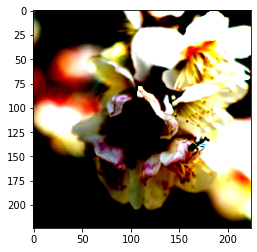

In [62]:
plt.imshow(im)

In [43]:
logits, att_mat = model(val_x)

In [88]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize = (16, 16))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

In [89]:
import torchvision


In [90]:
inputs = [a[0][0] for a in error_set]
classes = [a[-1].item() for a in error_set]

In [91]:
classes

[1, 1, 1, 0]

In [92]:
out = torchvision.utils.make_grid(inputs)


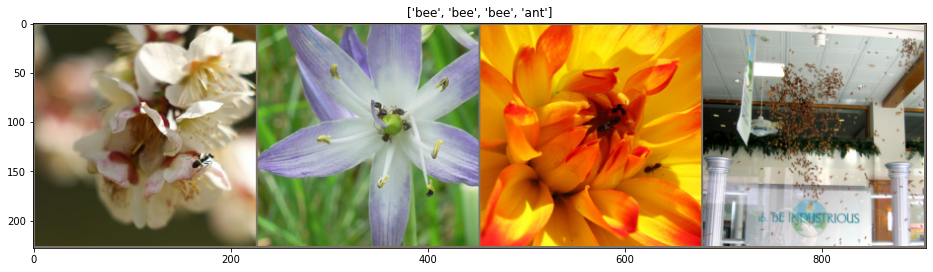

In [93]:
class_names = {0:"ant", 1:"bee"}
imshow(out,  title=[class_names[x] for x in classes])

In [98]:
valid_inputs = [a[0][0] for a in valid_set]
len(valid_inputs)
valid_classes = [a[-1].item() for a in valid_set]

In [97]:
valid_out = torchvision.utils.make_grid(valid_inputs)

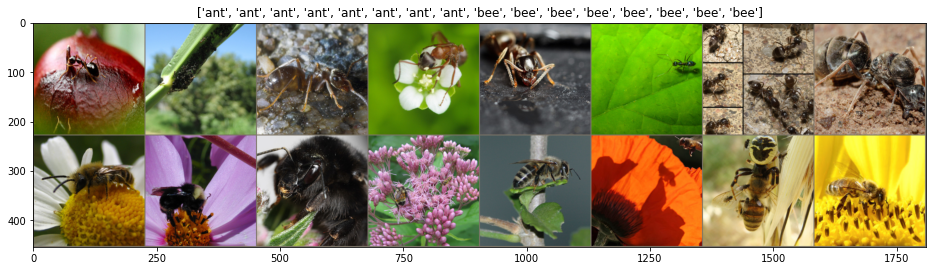

In [99]:
imshow(valid_out,  title=[class_names[x] for x in valid_classes])